# Overview
- フーリエ変換
- スペクトログラムについて学ぶ

# Import everything I need :)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# フーリエ変換

Text(0.5, 0, 'freq [Hz]')

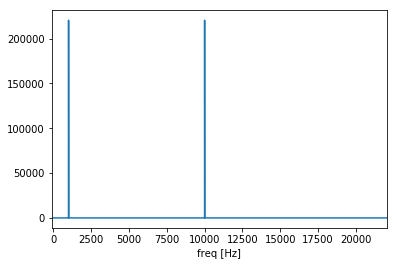

In [46]:
# データのパラメータ
sr = 44100
f1, f2 = 1000, 10000    # 周波数
length_sec = 10

# x,y
x = np.arange(0, length_sec*sr)/sr
y = np.sin(2*np.pi*f1*x) + np.sin(2*np.pi*f2*x)

# フーリエ変換
freq = np.arange(0, sr, 1/(length_sec))  # 周波数空間の間隔は、1/T。Tが大きくなれば、間隔が狭くなる(不確定性関係)。
amp = np.abs(np.fft.fft(y))

# plot
plt.plot(freq, amp)
plt.xlim(-100, sr/2)   # ナイキスト周波数まで表示
plt.xlabel('freq [Hz]')

# スペクトログラム

In [11]:
path = librosa.util.example_audio_file()
wav, sr = librosa.load(path)

## 強度

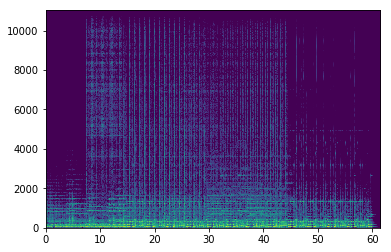

In [97]:
spec = np.abs(librosa.stft(wav))[:, :int(sr/2)]
spec = librosa.amplitude_to_db(spec)

plt.imshow(spec, aspect='auto', origin='lower', extent=(0, len(wav)/sr, 0, int(sr/2)))
# plt.xlim(0, 2)

## 位相スペクトログラム

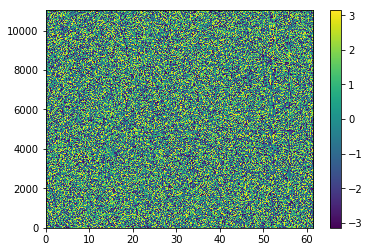

In [98]:
spec = librosa.stft(wav)# [:, :int(sr/2)]
phase = np.arctan2(spec.imag, spec.real)
phase = phase[:, :int(sr/2)]
plt.imshow(phase, aspect='auto', origin='lower', extent=(0, len(wav)/sr, 0, int(sr/2)))
# plt.xlim(0, 2)
plt.colorbar()

In [41]:
phase.shape

(1025, 2647)

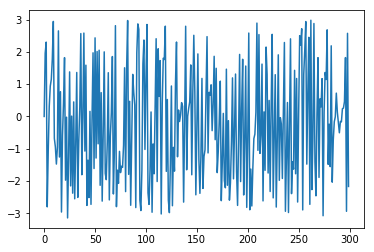

In [96]:
a = phase[25, :][:300]
plt.plot(a)